Dataset shape: (1000, 9)
Columns: ['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']


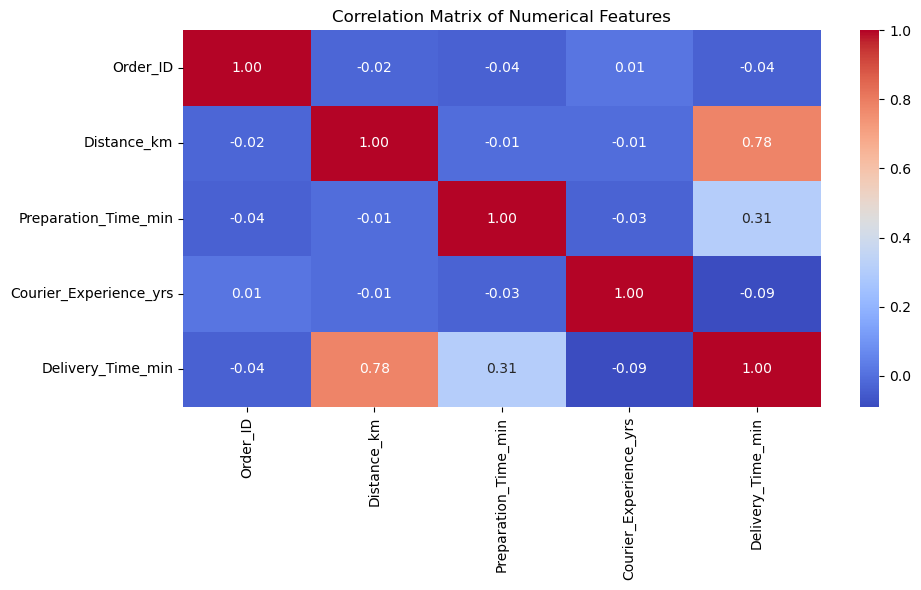

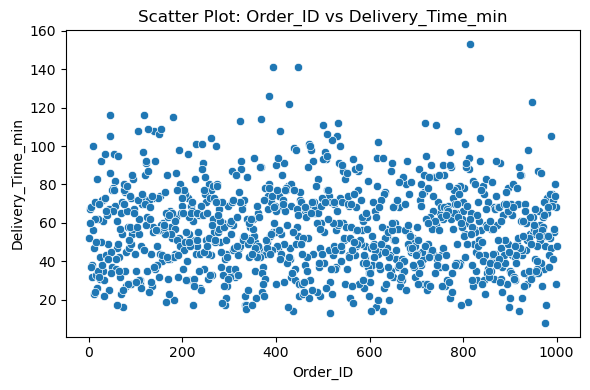

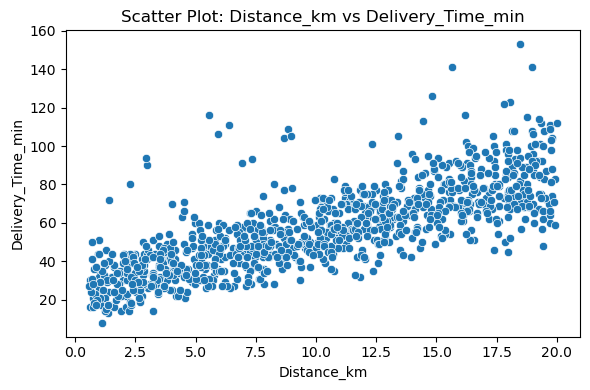

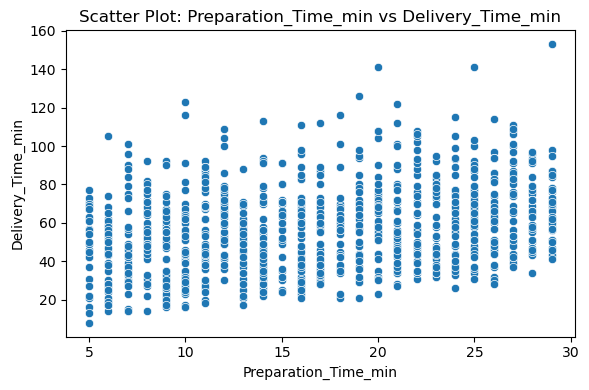

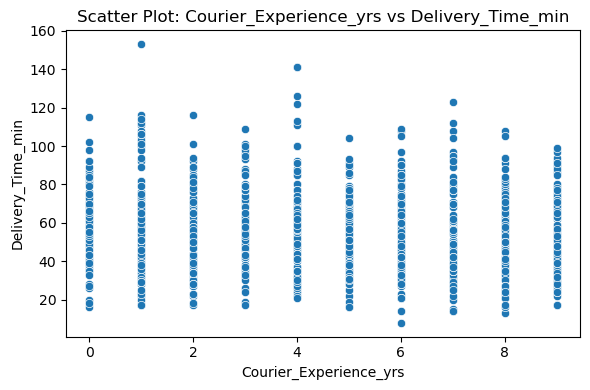

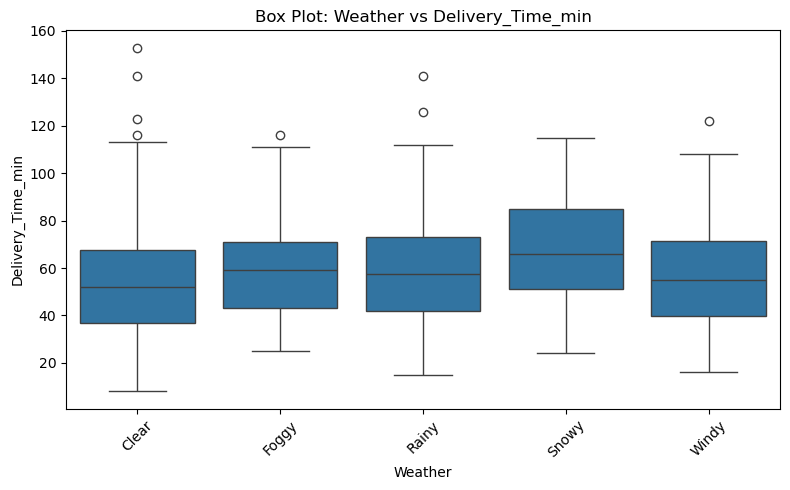

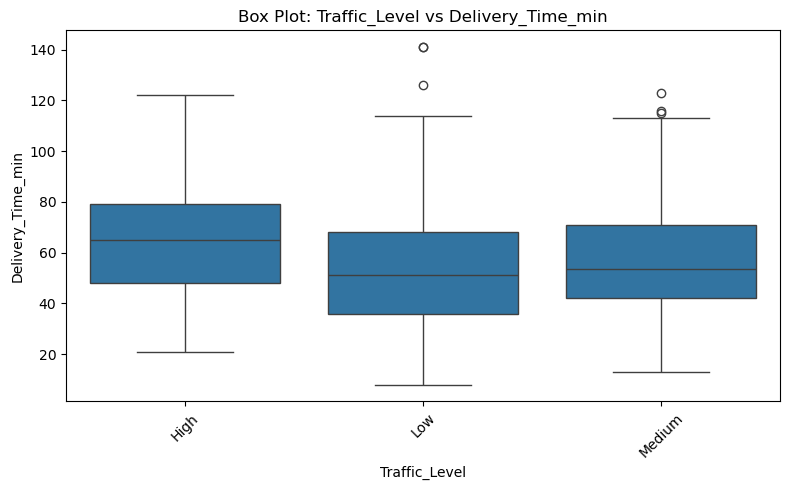

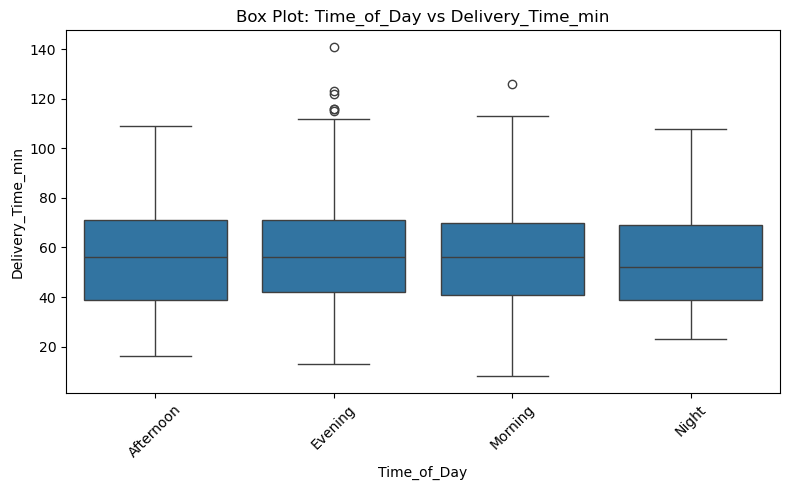

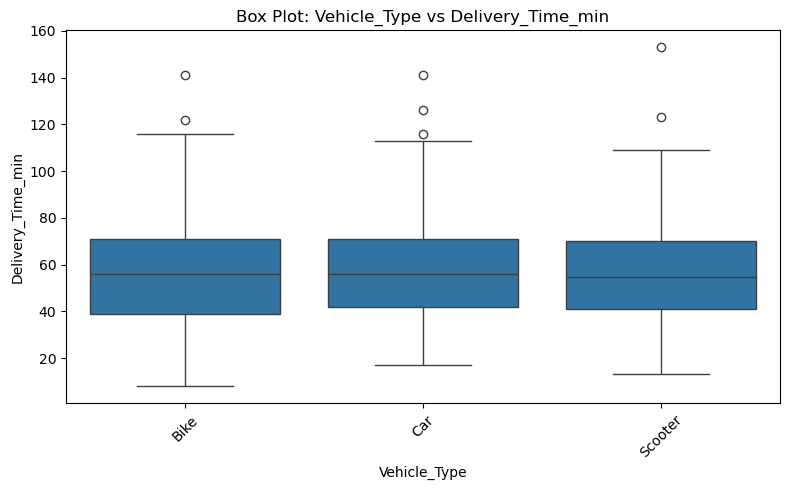

C:\Users\h.d.jha\AppData\Local\Temp\ipykernel_19836\1223742711.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery = df.groupby(col)["Delivery_Time_min"].mean().reset_index()


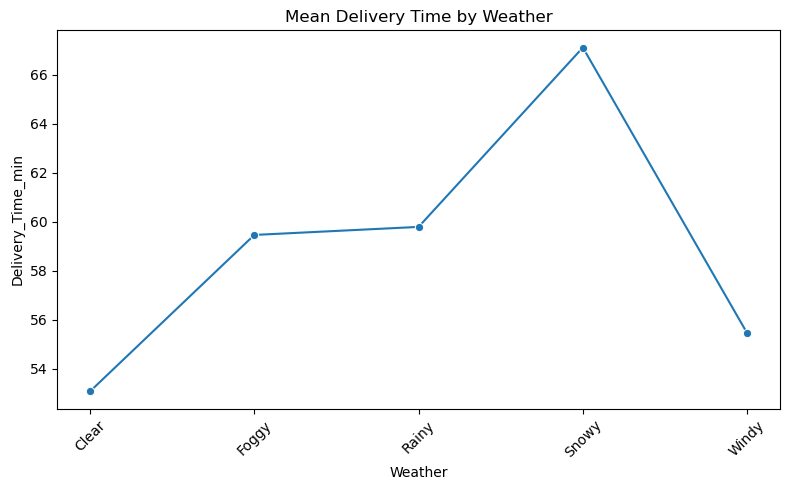

C:\Users\h.d.jha\AppData\Local\Temp\ipykernel_19836\1223742711.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery = df.groupby(col)["Delivery_Time_min"].mean().reset_index()


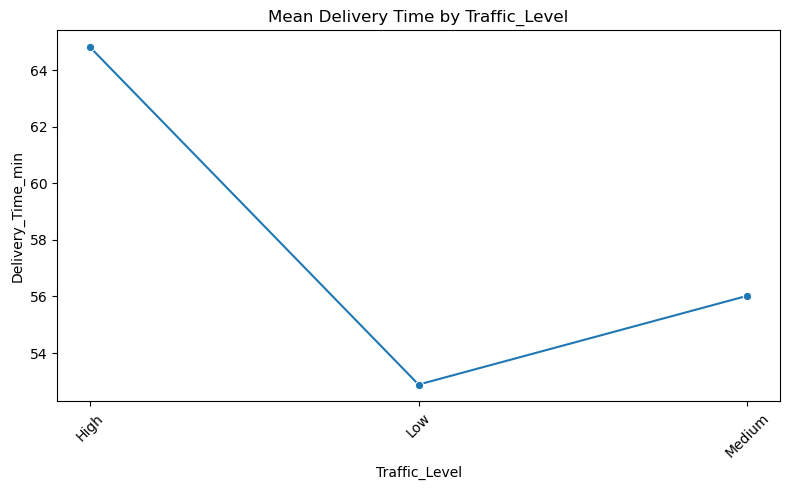

C:\Users\h.d.jha\AppData\Local\Temp\ipykernel_19836\1223742711.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery = df.groupby(col)["Delivery_Time_min"].mean().reset_index()


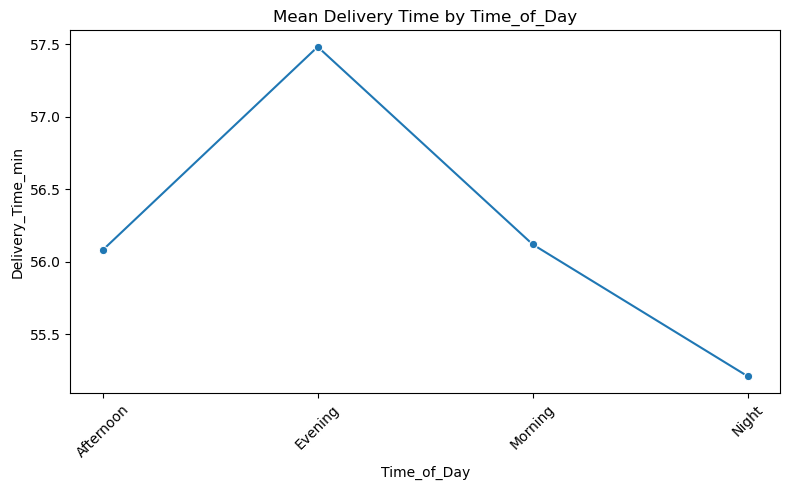

C:\Users\h.d.jha\AppData\Local\Temp\ipykernel_19836\1223742711.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery = df.groupby(col)["Delivery_Time_min"].mean().reset_index()


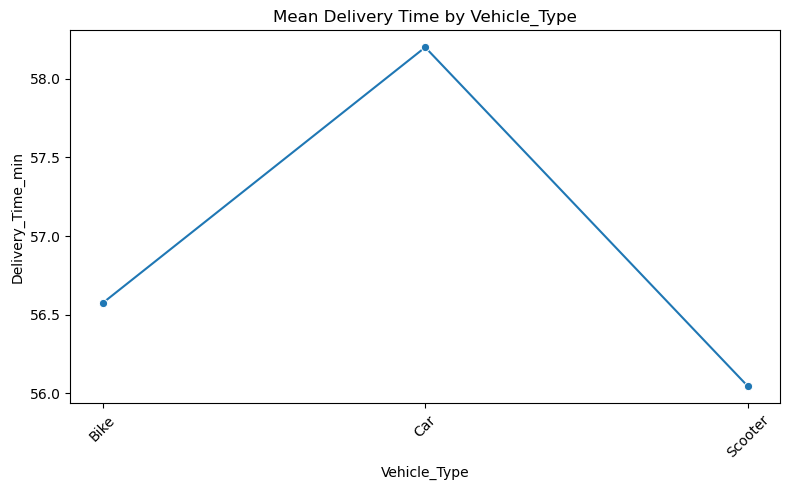

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Food_Delivery_Times.csv")

# Drop rows with missing target values
df = df.dropna(subset=["Delivery_Time_min"])

# Display basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Convert categorical columns to category dtype
categorical_cols = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

# Scatter plots for numerical features vs Delivery_Time_min
for col in numerical_cols:
    if col != "Delivery_Time_min":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y="Delivery_Time_min")
        plt.title(f"Scatter Plot: {col} vs Delivery_Time_min")
        plt.tight_layout()
        plt.show()

# Box plots for categorical features vs Delivery_Time_min
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, y="Delivery_Time_min")
    plt.title(f"Box Plot: {col} vs Delivery_Time_min")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Line plots for mean delivery time per category
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    mean_delivery = df.groupby(col)["Delivery_Time_min"].mean().reset_index()
    sns.lineplot(data=mean_delivery, x=col, y="Delivery_Time_min", marker="o")
    plt.title(f"Mean Delivery Time by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
df = pd.read_csv("Food_Delivery_Times.csv")

# Drop rows with missing target
df = df.dropna(subset=["Delivery_Time_min"])

# Create output directory for plots
os.makedirs("feature_plots", exist_ok=True)

# Set plot style
sns.set(style="whitegrid")

# Separate numerical and categorical features
numerical_features = ["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs"]
categorical_features = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

# Generate scatter plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y="Delivery_Time_min", alpha=0.6)
    plt.title(f"Scatter Plot: {feature} vs Delivery Time")
    plt.savefig(f"feature_plots/scatter_{feature}.png")
    plt.close()

# Generate line plots for categorical features (mean delivery time)
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    mean_delivery = df.groupby(feature)["Delivery_Time_min"].mean().sort_values()
    sns.lineplot(x=mean_delivery.index, y=mean_delivery.values, marker="o")
    plt.title(f"Line Plot: Average Delivery Time by {feature}")
    plt.ylabel("Average Delivery Time (min)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"feature_plots/line_{feature}.png")
    plt.close()

# Generate box plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature, y="Delivery_Time_min")
    plt.title(f"Box Plot: Delivery Time by {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"feature_plots/box_{feature}.png")
    plt.close()

print("All feature influence plots have been saved in the 'feature_plots' directory.")



All feature influence plots have been saved in the 'feature_plots' directory.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("feature_plots2", exist_ok=True)

# Load the dataset
df = pd.read_csv("Food_Delivery_Times.csv")

# Drop rows with missing target or feature values
df.dropna(subset=['Delivery_Time_min'], inplace=True)

# Fill missing values in numerical columns with median
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)

# -------------------------------
# Bell Curve (Distribution) Plots
# -------------------------------
numerical_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"feature_plots2/bell_curve_{feature}.png")
    plt.close()

# -------------------------------
# Feature Engineering
# -------------------------------
df['experience_per_km'] = df['Courier_Experience_yrs'] / (df['Distance_km'] + 1e-3)
df['prep_time_ratio'] = df['Preparation_Time_min'] / (df['Distance_km'] + 1e-3)
df['is_peak_hour'] = df['Time_of_Day'].isin(['Morning', 'Evening']).astype(int)

# -------------------------------
# Visualizations for Engineered Features
# -------------------------------
engineered_features = ['experience_per_km', 'prep_time_ratio', 'is_peak_hour']

for feature in engineered_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=feature, y='Delivery_Time_min', alpha=0.6)
    plt.title(f'{feature} vs Delivery_Time_min')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"feature_plots2/scatter_{feature}.png")
    plt.close()

# Box plots for categorical features
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=feature, y='Delivery_Time_min')
    plt.title(f'Delivery Time by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (min)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"feature_plots2/boxplot_{feature}.png")
    plt.close()

# Line plots for average delivery time by category
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    avg_delivery = df.groupby(feature)['Delivery_Time_min'].mean().reset_index()
    sns.lineplot(data=avg_delivery, x=feature, y='Delivery_Time_min', marker='o')
    plt.title(f'Average Delivery Time by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Delivery Time (min)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"feature_plots2/lineplot_{feature}.png")
    plt.close()

print("All plots have been generated and saved successfully.")



C:\Users\h.d.jha\AppData\Local\Temp\ipykernel_19836\3349984073.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)


All plots have been generated and saved successfully.


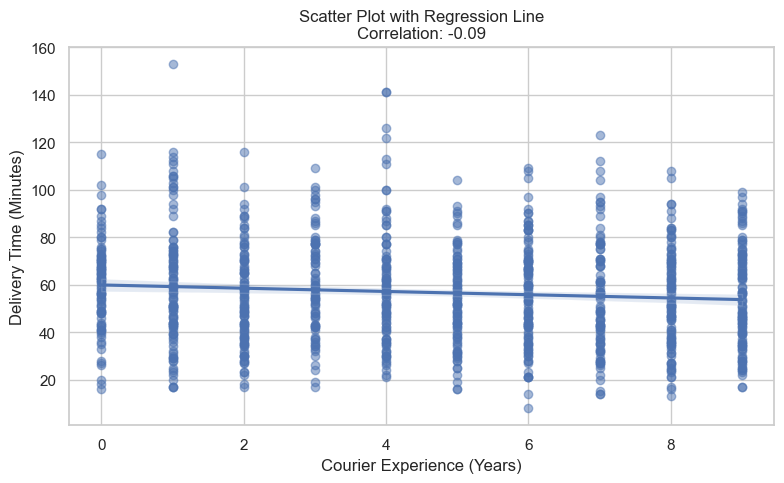

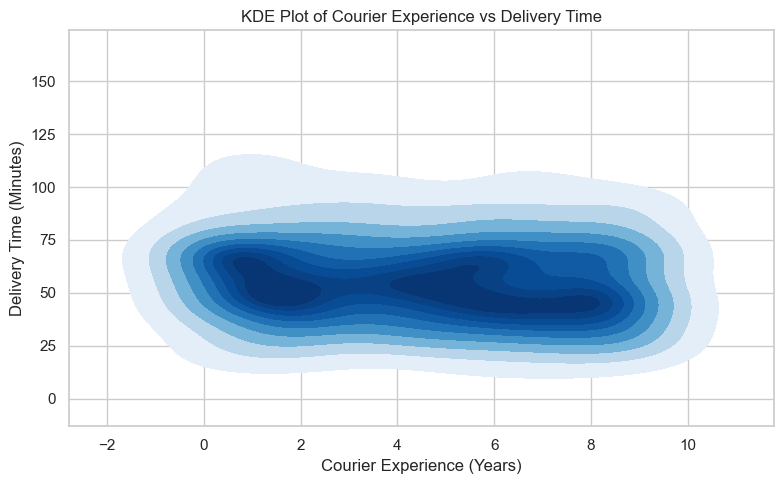

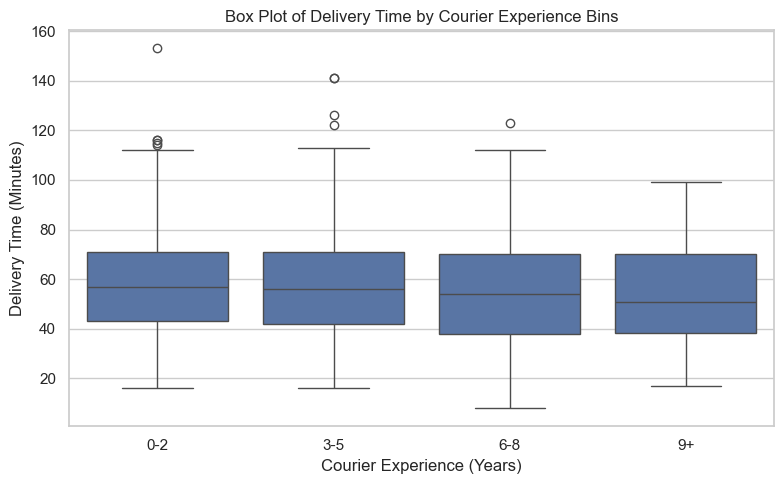

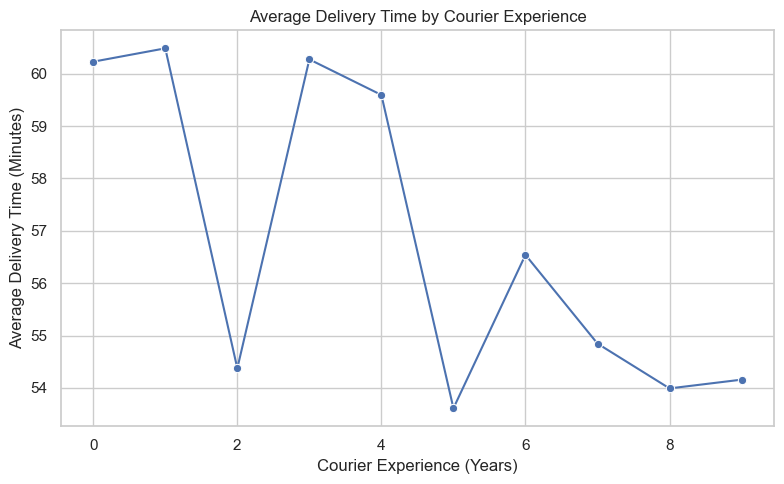

All plots and correlation summary have been generated.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Load the dataset
df = pd.read_csv("Food_Delivery_Times.csv")

# Drop rows with missing values in relevant columns
df = df[['Courier_Experience_yrs', 'Delivery_Time_min']].dropna()

# Calculate correlation coefficient
corr_coef, p_value = pearsonr(df['Courier_Experience_yrs'], df['Delivery_Time_min'])

# Set plot style
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df, scatter_kws={'alpha':0.5})
plt.title(f"Scatter Plot with Regression Line\nCorrelation: {corr_coef:.2f}")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (Minutes)")
plt.tight_layout()
# plt.savefig("scatter_regression.png")
plt.show()
# plt.close()

# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min', fill=True, cmap="Blues")
plt.title("KDE Plot of Courier Experience vs Delivery Time")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (Minutes)")
plt.tight_layout()
# plt.savefig("kde_plot.png")
plt.show()
# plt.close()

# Box plot
plt.figure(figsize=(8, 5))
df['Experience_Bin'] = pd.cut(df['Courier_Experience_yrs'], bins=[-1, 2, 5, 8, 11], labels=['0-2', '3-5', '6-8', '9+'])
sns.boxplot(x='Experience_Bin', y='Delivery_Time_min', data=df)
plt.title("Box Plot of Delivery Time by Courier Experience Bins")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (Minutes)")
plt.tight_layout()
# plt.savefig("box_plot.png")
plt.show()
# plt.close()

# Line plot of average delivery time by experience
plt.figure(figsize=(8, 5))
avg_delivery = df.groupby('Courier_Experience_yrs')['Delivery_Time_min'].mean()
sns.lineplot(x=avg_delivery.index, y=avg_delivery.values, marker='o')
plt.title("Average Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Average Delivery Time (Minutes)")
plt.tight_layout()
# plt.savefig("line_plot.png")
plt.show()
# plt.close()

# Save correlation coefficient to a text file
with open("correlation_summary.txt", "w") as f:
    f.write(f"Pearson Correlation Coefficient between Courier Experience and Delivery Time: {corr_coef:.4f}\n")
    f.write(f"P-value: {p_value:.4e}\n")

print("All plots and correlation summary have been generated.")

